# Read Data and Download 



## !!!! Reference !!!

* [collaborative-filtering](https://www.kaggle.com/code/chandrakanthlns/collaborative-filtering)

* [A beginner's guide to Recommendation Systems](https://www.kaggle.com/code/arushikhokharr/a-beginner-s-guide-to-recommendation-systems)

* [LightGCN->Pytorch(From Scratch)](https://www.kaggle.com/code/dipanjandas96/lightgcn-pytorch-from-scratch)

* [Comprehensive Guide to build a Recommendation Engine from scratch (in Python)](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/)

## Download the dataset movielens 100k



Upgrade system & install wget, zip



In [7]:
!apt-get update
!apt-get install -y zip gzip tar wget



E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/


E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


Using `wget` to download movielens100k

In [8]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip

--2022-12-18 11:18:11--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 

128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... 

connected.


HTTP request sent, awaiting response... 

200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.1’

ml-100k.zip.1         0%[                    ]       0  --.-KB/s               

ml-100k.zip.1         0%[                    ]  40.00K   105KB/s               

ml-100k.zip.1         4%[                    ] 216.00K   284KB/s               

ml-100k.zip.1        11%[=>                  ] 568.00K   591KB/s               

ml-100k.zip.1        14%[=>                  ] 680.00K   497KB/s               

ml-100k.zip.1        46%[========>           ]   2.20M  1.36MB/s               

ml-100k.zip.1        57%[==========>         ]   2.70M  1.42MB/s               

ml-100k.zip.1        70%[=============>      ]   3.29M  1.57MB/s               

ml-100k.zip.1        83%[===============>    ]   3.91M  1.70MB/s               

ml-100k.zip.1       100%[===================>]   4.70M  1.87MB/s    in 2.5s    

2022-12-18 11:18:16 (1.87 MB/s) - ‘ml-100k.zip.1’ saved [4924029/4924029]



Using `zip` to unzip the `ml-100k.zip`

In [9]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install surprise

## Imports



In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

from surprise.model_selection import cross_validate
from surprise import Reader, Dataset, KNNBasic, accuracy

import time

## Reading the data using pandas



In [2]:
col=["user","item","rating","time"]
df = pd.read_csv('ml-100k/u.data', delimiter="\t", names=col)

df

,user,item,rating,time
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


Get the size of users and items



In [3]:
n_users = df['user'].unique().shape[0]
n_items = df['item'].unique().shape[0]
n_users, n_items

(943, 1682)

Read the `u.item` data to get name of movie

In [4]:

movies=pd.read_csv("ml-100k/u.item",sep="\|",header= None,encoding = "ISO-8859-1")[[0,1]]

movies.columns = ["item", "name"]
movies

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,item,name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [5]:
rating_train = pd.read_csv("ml-100k/ua.base",sep="\t",header= None, names=col)
rating_test = pd.read_csv("ml-100k/ua.test",sep="\t",header= None, names=col)

rating_train.shape, rating_test.shape

((90570, 4), (9430, 4))

In [6]:
rating_train.head(20)

,user,item,rating,time
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
5,1,6,5,887431973
6,1,7,4,875071561
7,1,8,1,875072484
8,1,9,5,878543541
9,1,10,3,875693118


In [7]:
rating_test.head(20)

,user,item,rating,time
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201
5,1,160,4,875072547
6,1,171,5,889751711
7,1,189,3,888732928
8,1,202,5,875072442
9,1,265,4,878542441


## Reading movie item and its id



In [6]:
idx_to_movie = {}
with open('ml-100k/u.item', 'r',encoding = "ISO-8859-1")as f:
    for line in f.readlines():
        info = line.split('|')
        idx_to_movie[int(info[0])-1] = info[1]
        
idx_to_movie[0], idx_to_movie[1], idx_to_movie[2]

('Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)')

In [7]:
movie_to_idx = {v: k for k, v in idx_to_movie.items()}
movie_to_idx['Star Wars (1977)']

49

# Exploratory Data Analysis



## Adjust the dataframe to further anaysis



Associating the Movie name with item id  
(Combine u.item and u.data)



In [8]:
merged_df = pd.merge(df,movies,on="item")
merged_df

,user,item,rating,time,name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


We can checkout the mean value of each movie



In [9]:
movie_rate_mean = merged_df.groupby("name").mean()['rating']
# for k,v  in movie_rate_mean.sort_values(ascending=False).iteritems():
#     print("{:<50}{:.2}".format(k[:20] + ("..." if len(k) > 20 else "" ), v) )
movie_rate_mean.head(10)

name
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
Name: rating, dtype: float64

We can also count how many rating each movie has



In [10]:
movie_rate_count =  merged_df["name"].value_counts()

movie_id_count = df["item"].value_counts()
movie_id_count = movie_id_count.to_frame()
# for k, v in movie_rate_count.iteritems():
#     print("{:<50}{}".format(k[:20] + ("..." if len(k) > 20 else "" ), v) )
movie_rate_count.head(10)

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: name, dtype: int64

In [11]:
movie_id_count.columns = ['rate_count']
movie_id_count

,rate_count
50,583
258,509
100,508
181,507
294,485
...,...
852,1
1505,1
1653,1
1452,1


In [12]:
rate_count_and_mean = pd.concat([movie_rate_count, movie_rate_mean], axis=1, keys=["rate_count", "mean_value"] )
rate_count_and_mean

,rate_count,mean_value
Star Wars (1977),583,4.358491
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
...,...,...
"Leopard Son, The (1996)",1,1.000000
Stefano Quantestorie (1993),1,1.000000
Quartier Mozart (1992),1,1.000000
"Reluctant Debutante, The (1958)",1,3.000000


In [13]:

print(len(movie_rate_count))
print(np.count_nonzero(movie_rate_count > 100))


1664
334


Sorting by mean rating and filter out the movie which has rating less than 100.  

In [14]:
RATE_COUNT_THRESHOLD = 100
rate_count_and_mean.loc[rate_count_and_mean['rate_count'] > RATE_COUNT_THRESHOLD].sort_values(ascending=False, by="mean_value").head(10)


,rate_count,mean_value
"Close Shave, A (1995)",112,4.491071
Schindler's List (1993),298,4.466443
"Wrong Trousers, The (1993)",118,4.466102
Casablanca (1942),243,4.456790
"Shawshank Redemption, The (1994)",283,4.445230
Rear Window (1954),209,4.387560
"Usual Suspects, The (1995)",267,4.385768
Star Wars (1977),583,4.358491
12 Angry Men (1957),125,4.344000
Citizen Kane (1941),198,4.292929


In [15]:
merged_df['movie_count']= merged_df['name'].map(merged_df['name'].value_counts())
merged_df

,user,item,rating,time,name,movie_count
0,196,242,3,881250949,Kolya (1996),117
1,63,242,3,875747190,Kolya (1996),117
2,226,242,5,883888671,Kolya (1996),117
3,154,242,3,879138235,Kolya (1996),117
4,306,242,5,876503793,Kolya (1996),117
...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),1
99996,655,1640,3,888474646,"Eighth Day, The (1996)",1
99997,655,1637,3,888984255,Girls Town (1996),1
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",1


In [16]:
n=600

# count the value of item columns & get the index(user id)
top_n_item_id = df['item'].value_counts()[:n].index.tolist()

# filter out the movie that are not in the top k list
df_top_k = df[ df['item'].isin(top_n_item_id)]
df_top_k

,user,item,rating,time
0,196,242,3,881250949
1,186,302,3,891717742
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
...,...,...,...,...
99993,913,209,2,881367150
99995,880,476,3,880175444
99996,716,204,5,879795543
99998,13,225,2,882399156


## Plots



### Rating Distribution



In this plot we can found out: rating 3, 4 are the most rating 



<AxesSubplot:xlabel='rating', ylabel='Count'>

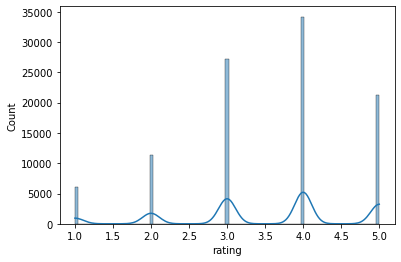

In [17]:
sns.histplot(df["rating"], kde=True)


<AxesSubplot:xlabel='rating', ylabel='Density'>

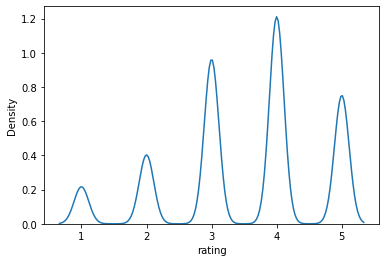

In [18]:
sns.kdeplot(df["rating"])

A plot to show the relation between user&item.  
We can also see the distribution of rating by this.



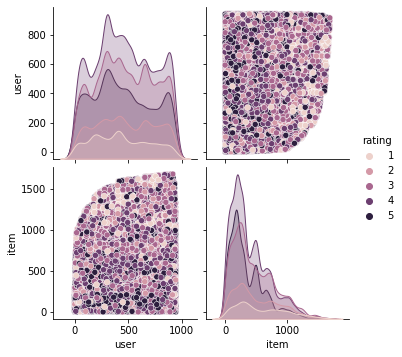

In [19]:
sns.pairplot(df[['user','item', 'rating']], hue='rating')

If we sort out the movie which is lack of rating, we can find a more flat a smooth slope in the distribution.



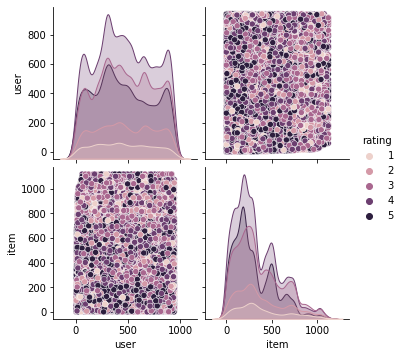

In [20]:
sns.pairplot(df_top_k[['user','item', 'rating']], hue='rating')


To get a idea of user-item relation, we using scatter plot here and sample some point stand for the distribution.

<AxesSubplot:xlabel='user', ylabel='item'>

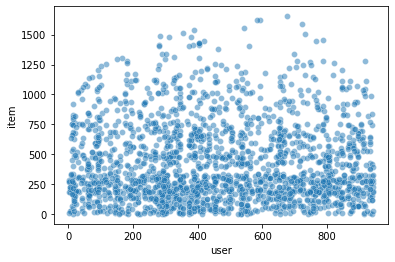

In [32]:
sns.scatterplot(x="user", y="item", data=df.sample(n=2000), alpha=0.5)

<AxesSubplot:xlabel='user', ylabel='rating'>

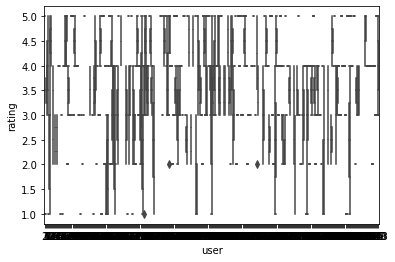

In [18]:
sns.boxplot(x="user", y="rating", data=df.sample(n=500))

The heatmap also provide a interesting view of user-item relation.  

In this figure we can see there are 2 users (408, 667) has rated a lots of movies on plots cause  
the 2 significant straight line. We can also learn from the line color that user 408 has a lots of rating though.  
But the the user rated movie are mostly low rating (the straight line on user 408 basically black).

<AxesSubplot:xlabel='user', ylabel='item'>

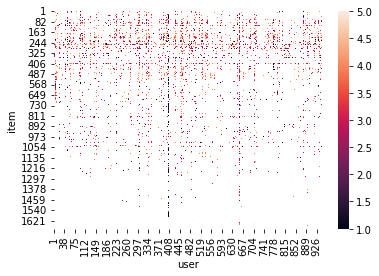

In [20]:
sns.heatmap(df.pivot_table(index="item", columns="user", values="rating"))

<AxesSubplot:xlabel='user', ylabel='item'>

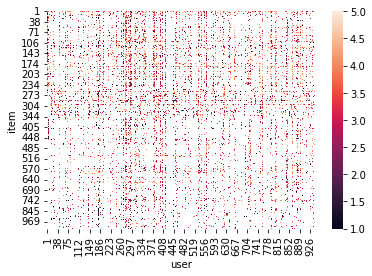

In [19]:
sns.heatmap(df_top_k.pivot_table(index="item", columns="user", values="rating"))

### Average Rating Distribution



We can learn from this plot that the mean value 3.2 are the most movie rating belongs to.



<AxesSubplot:xlabel='mean_value', ylabel='Count'>

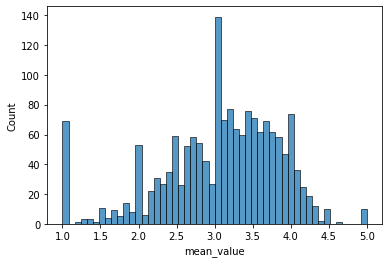

In [29]:
sns.histplot(rate_count_and_mean['mean_value'], bins=50)

The rating count of the most of movies (above 70%) are less than 50.

<AxesSubplot:xlabel='rate_count', ylabel='Count'>

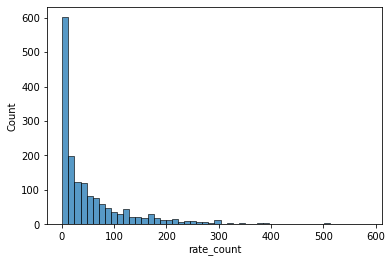

In [30]:
sns.histplot(rate_count_and_mean['rate_count'], bins=50)

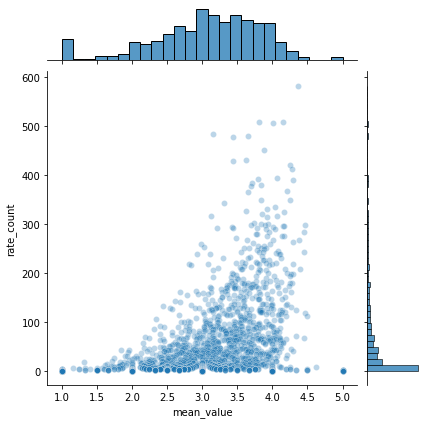

In [34]:
sns.jointplot(x='mean_value',y='rate_count',data=rate_count_and_mean,alpha=0.3)

### User Distribution



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
col=["user_id","age","gender","occupation","zip_code"]
uin = pd.read_csv('ml-100k/u.user', delimiter="|", names=col) 
#uin = uin.set_index('user_id')
uin.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

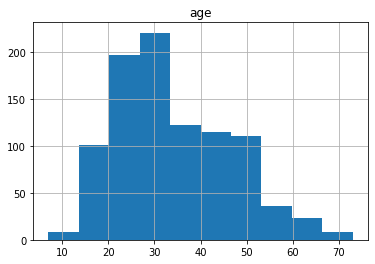

In [3]:
#data = uin.loc[:, ['age', 'occupation']]
#data = data.set_index('age')
#print(data)
uin.hist(column = "age")
#uin["age_category"] = pd.cut(uin["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[5, 15, 25, 35, 45, 55, 65, 75])
#uin["age_category"].hist()


We can see that the age distribution is mostly young and middle-aged



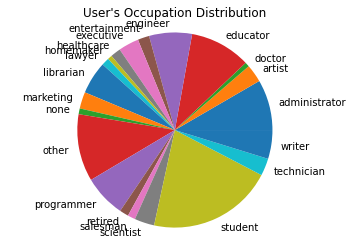

In [4]:
occupation_count = uin[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count["size"], labels=occupation_count["occupation"])
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

According to the above figure \(User's Occupation Distribution\), we can know that the top five most engaged occupations are student, administrator, educator, engineer and programmer


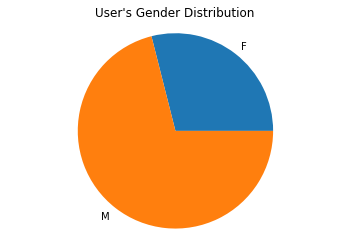

In [5]:
gender_count = uin[["user_id", "gender"]].groupby("gender", as_index=False).size()  # count the numbers
plt.pie(gender_count["size"], labels=gender_count["gender"])
plt.title("User's Gender Distribution")
plt.axis("equal")
plt.show()

The sex ratio is mostly male, even about twice that of female



## Additional data analysis



The reference between occupation and rating.


In [6]:
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv('ml-100k/u.user', sep = '|', header = None, names=user_header)
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True)

occupation = pd.read_csv('ml-100k/u.occupation', header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head()


,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


In [7]:
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv('ml-100k/u.data', sep = '\t', header = None, names=rating_header)
rating.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
pd.merge(rating, users_num[["user_id", "occupation"]]).head()


,user_id,item_id,rating,timestamp,occupation
0,196,242,3,881250949,20
1,196,393,4,881251863,20
2,196,381,4,881251728,20
3,196,251,3,881251274,20
4,196,655,5,881251793,20


In [9]:
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv('ml-100k/u.item', sep = '|', header = None, encoding = 'latin1', names = movie_header)
movies.head()

,item_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
f = pd.merge(rating, movies, on="item_id")
f = pd.merge(f, users_num, on="user_id")
f = f.drop(['timestamp','release_date','video_release_date','IMDb_URL','unknown','zip_code'], axis=1)
f.head()

,user_id,item_id,rating,title,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation
0,196,242,3,Kolya (1996),0,0,0,0,1,0,...,0,0,0,0,0,0,0,49,1,20
1,196,257,2,Men in Black (1997),1,1,0,0,1,0,...,0,0,0,1,0,0,0,49,1,20
2,196,111,4,"Truth About Cats & Dogs, The (1996)",0,0,0,0,1,0,...,0,0,1,0,0,0,0,49,1,20
3,196,25,4,"Birdcage, The (1996)",0,0,0,0,1,0,...,0,0,0,0,0,0,0,49,1,20
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,49,1,20


Data preprocessing



In [11]:
student_rating = f.loc[f['occupation']==18].loc[f['rating']>=4]
# 18 is the student
movie_hobby_every_student = student_rating[["user_id", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]].groupby("user_id", as_index=False).mean()
movie_hobby_every_student.head(
#196
)

,user_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,9,0.200000,0.150000,0.000000,0.000000,0.300000,0.000000,0.0,0.450000,0.000000,0.05,0.050000,0.000000,0.050000,0.400000,0.200000,0.250000,0.200000,0.000000
1,30,0.344828,0.241379,0.034483,0.137931,0.448276,0.000000,0.0,0.310345,0.034483,0.00,0.000000,0.068966,0.034483,0.310345,0.275862,0.137931,0.137931,0.034483
2,32,0.388889,0.222222,0.000000,0.000000,0.222222,0.111111,0.0,0.500000,0.000000,0.00,0.055556,0.000000,0.055556,0.333333,0.333333,0.111111,0.111111,0.000000
3,33,0.500000,0.062500,0.000000,0.000000,0.000000,0.125000,0.0,0.375000,0.000000,0.00,0.187500,0.000000,0.250000,0.187500,0.250000,0.687500,0.062500,0.000000
4,36,0.230769,0.076923,0.000000,0.153846,0.230769,0.076923,0.0,0.384615,0.000000,0.00,0.230769,0.000000,0.230769,0.076923,0.076923,0.384615,0.000000,0.000000


This is the table that every occupation for student users

The value of the category shows the user's preference category

When the value close to 1 means this user likes this movie category very much!



In [14]:
movie_hobby_of_all_student = movie_hobby_every_student[["Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]].mean()
movie_hobby_of_all_student.head(19)

Action         0.294160
Adventure      0.151028
Animation      0.035632
Children's     0.060436
Comedy         0.253085
Crime          0.094324
Documentary    0.006609
Drama          0.416276
Fantasy        0.008192
Film-Noir      0.015023
Horror         0.061481
Musical        0.038118
Mystery        0.057066
Romance        0.226489
Sci-Fi         0.154693
Thriller       0.249598
War            0.109261
Western        0.012237
dtype: float64

This table shows the movie preferences of the student group


# Evaluation Functions



## A demo baseline model

The baseline model is if we guess all the rating is **3**



In [27]:
def baseline(user_id, movie_id):
    return 3.0

## RSME & Accuracy

RMSE is Rooted Mean Square Error

Acc is 5-way classification accuracy.



In [28]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def acc(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

## Precision & Recall



We convert the 5-way classification problem to 2-way classification problem.  
If the $\text{rating} >= 4$ we categorize it into **user like it**.  
On the other hand, if the $\text{rating} < 4$ we categorize it into **user don't like it**.  

Therefore, we can use it to calculate precision, recall and 2-way accuracy.  
But there are another method that we can use macro precision & macro recall.
Macro precision convert each rating to a binary classification  problem and we would have 5 precision.    
After that, we can average the 5 precision to get macro precision.  



In [23]:
def precison_recall(y_true, y_pred):
    # size of prediction value array  
    count = y_true.shape[0]
    
    binary_true = y_true >= 4
    binary_pred = y_pred >= 4
    

    TP = ( np.logical_and(binary_true, binary_pred)).sum()
    TN = ( np.logical_not( np.logical_or(binary_true, binary_pred))).sum()
    FN = (np.logical_and (binary_true ,(binary_pred == False) ) ).sum()
    FP = ( np.logical_and ((binary_true == False) ,binary_pred ) ).sum()


    return ((TP+TN)/ (count) ) ,(TP / (TP+FP)) , (TP / (TP+FN))


arr_1 = np.array([1,2,3,4,5,4,3])
arr_2 = np.array([2,3,5,3,5,1,2])
precison_recall(arr_1, arr_2)

(0.5714285714285714, 0.5, 0.3333333333333333)

## Scoring a model



In [29]:
def predict(cf_model):
    #Construct a list of user-movie tuples from the testing dataset
    id_pairs = zip(rating_test['user'], rating_test['item'])
    
    #Predict the rating for every user-movie tuple
    y_pred = np.array([cf_model(user, movie) for (user, movie) in id_pairs])
    
    #Extract the actual ratings given by the users in the test data
    y_true = np.array(rating_test['rating'])
    
    return (y_true, y_pred)

In [32]:
#Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model, eval_func = rmse):
    
    #Construct a list of user-movie tuples from the testing dataset
    id_pairs = zip(rating_test['user'], rating_test['item'])
    
    #Predict the rating for every user-movie tuple
    y_pred = np.array([cf_model(user, movie) for (user, movie) in id_pairs])
    
    #Extract the actual ratings given by the users in the test data
    y_true = np.array(rating_test['rating'])
    
    #Return the final RMSE score
    return eval_func(y_true, y_pred)

score(baseline)

1.265036811170378

If we try to use dummy prediction by predicting all movie with 3 star.  
We can get a RSME value with 1.26  

The 5-way acc is .25 because of the data distribution.  
We have more data on rating 3 and rating 4 which make the dummy model higher acc.  



In [33]:
score(baseline, acc)

0.25705196182396606

# Recommender system with Pearson Similarity 



We pandas `pivot_table()` to create User-Item Matrix.  



In [34]:
matrix = df.pivot_table(index='user', columns='item', values='rating')
matrix

item,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert the movie id to movie name



In [31]:
matrix_with_name = merged_df.pivot_table(index= 'user', columns='name', values='rating')
matrix_with_name


name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Trying to Get Similiarty of "Star Wars (1997)"

Get the user and rating with movie "Star Wars (1997)"



In [27]:
matrix_with_name['Star Wars (1977)']

user
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

Using `corrwith` to calculate the similarity score.



In [28]:
# default correlation method is  pearson
# so we don't need to assign method here actually
similarity_starWars = matrix_with_name.corrwith(matrix_with_name['Star Wars (1977)'], method='pearson')


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


This is the item-item Pearson similarity

In [29]:
similarity_starWars

name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [30]:
corr_starWars = pd.DataFrame(similarity_starWars, columns=['corr'])
corr_starWars

,corr
name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


Drop NA

In [31]:
corr_starWars = corr_starWars.dropna()
corr_starWars

,corr
name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [51]:
corr_starWars_count = corr_starWars.join(rate_count_and_mean['rate_count'])
corr_starWars_count

,corr,rate_count
name,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


There are a lot of movies come with correlation 1.   
But the rate count is too low to losing accuracy for recommender system.



In [53]:
corr_starWars_count.sort_values('corr', ascending=False)

,corr,rate_count
name,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
...,...,...
Roseanna's Grave (For Roseanna) (1997),-1.0,5
For Ever Mozart (1996),-1.0,3
American Dream (1990),-1.0,2


> `[TODO] This description need to be complete`    
We can filter out some 


And we can recommend these movie to people who likes "Star Wars (1977)" 


In [54]:
corr_starWars_count[corr_starWars_count['rate_count'] > 100].sort_values('corr', ascending=False)

,corr,rate_count
name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## A simple similarity function with item-item prediction



In [40]:

def get_similarity_of_movie(matrix, movie, rate_count_threshold=  100, count_df = rate_count_and_mean):
    
    # get item-item similarity matrix by corrwith
    similarity_matrix = matrix.corrwith(matrix[movie])
    
    # convert the similarity matrix to DataFrame
    corr = pd.DataFrame(similarity_matrix, columns=['corr'])
    
    # Drop Nan in the DataFrame
    corr.dropna(inplace=True)
    
    # Join the rate_count into the DataFrame
    corr_with_count = corr.join(count_df['rate_count'])
    
    # Filter out the movies which has low rate count by rate_count_threshold
    similarity = corr_with_count[corr_with_count['rate_count'] > rate_count_threshold].sort_values('corr', ascending=False)

    return similarity


We can recommend these movie to people who likes "As Good As It Gets (1997)" with filter out low `rate_count` outliers.

In [95]:
get_similarity_of_movie(matrix_with_name, "As Good As It Gets (1997)").head(5)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,corr,rate_count
name,,
As Good As It Gets (1997),1.000000,112
Apt Pupil (1998),0.701931,160
"Mask, The (1994)",0.618215,129
Batman Forever (1995),0.587782,114
Glory (1989),0.533915,171


## Build the model



In [36]:
matrix_train = rating_train.pivot_table(index='user', columns='item', values='rating')
matrix_train

item,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
get_similarity_of_movie(matrix_train, 30, 100, movie_id_count)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,corr,rate_count
item,,
260,1.000000,127
678,0.870388,219
303,0.851469,134
747,0.834784,102
510,0.793116,121
...,...,...
1047,-0.973329,134
326,-1.000000,175
815,-1.000000,112


## Experiemnts & Evaluation

In [38]:
# hash table to cache our get_similarity_of_movie function
pearson_movie = {}

In [41]:
def pearson_wrapper(top_n = 30):
    def pearson_corr_model(user, item, threshold=100):

        # default value if the item is not in our train data
        if item not in matrix_train :
            return 3

        # if the item is in our hash table, we directly use the value
        #     to accelerate the algorithm
        if item in pearson_movie:
            rank_list = pearson_movie[item]
        else:

            # get filtered item-item similarity
            sim = get_similarity_of_movie(matrix_train, item, threshold, movie_id_count)

            # convert the result to a list
            rank_list = sim['corr'].keys().to_list()

            # add the item into hash table (for future use)
            pearson_movie[item] = rank_list


        iter = 0
        while iter < len(rank_list):

            # only use top_k result
            pred_movie = rank_list[iter: iter+top_n]

            # find the rate of this user with similar movie
            pred_rate = matrix_train.loc[user][pred_movie]

            # calculate the means of the rate with all similar movies
            avg = np.nanmean(pred_rate.values)

            # if the result is not nan, we round the value
            if( not np.isnan(avg)):
                rounded_avg = np.round(avg)
                return rounded_avg

            else:
                # next try if all the result is nan(not found).
                iter+=top_n
        return 3
    return pearson_corr_model
print(pearson_wrapper(30)(1, 30))
print(pearson_wrapper(30)(1,1582))


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


4.0
3


We can get the result of following experiments that   
if we increase the k value of top_k,  
the RMSE can slowing drop down but the acc is not increasing so much.



In [100]:

score(pearson_wrapper(30)), score(pearson_wrapper(30), acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


(1.1735418289000843, 0.37147401908801697)

In [126]:

score(pearson_wrapper(100)), score(pearson_wrapper(100), acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


(1.0987315543989922, 0.37857900318133614)

In [74]:
score(pearson_corr_model, acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


0.37571580063626725

In [42]:
n_candidate = [2, 6, 10, 20, 30, 60, 100, 200]

item_pearson_rsme = []
item_pearson_acc = []
item_pearson_time = []
item_pearson_bin_acc = []
item_pearson_bin_precision = []
item_pearson_bin_recall = []
for n in n_candidate:

        s = time.time()
        
        # get RMSE
        item_pearson_rsme.append(score(pearson_wrapper(n)))
        e = time.time()
    
        # get 5-way Acc
        item_pearson_acc.append(score(pearson_wrapper(n), acc))
        item_pearson_time.append(e-s)
        
        # get binary acc & precision & recall
        APR = score(pearson_wrapper(n), precison_recall)
        item_pearson_bin_acc.append(APR[0])
        item_pearson_bin_precision.append(APR[1])
        item_pearson_bin_recall.append(APR[2])
        
print(item_pearson_rsme)
print(item_pearson_acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


[1.3494038587928865, 1.3041657702568528, 1.2727672109528814, 1.2139608537349333, 1.1735418289000843, 1.1223177049093167, 1.0987315543989922, 1.0847443023517678]
[0.34432661717921526, 0.35365853658536583, 0.3604453870625663, 0.36468716861081657, 0.37147401908801697, 0.37688229056203604, 0.37857900318133614, 0.37741251325556735]


# Recommender system with Jaccard Distance



## Constuct Jaccard similarity matrix  



A simple data matrix rather than DataFrame

In [50]:
# data matrix using train data
data_matrix = np.zeros((n_users, n_items))
for row in rating_train.itertuples():
    data_matrix[row[1]-1, row[2]-1] = row[3]

data_matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

After we get pairwise distance, we can use $\text{similarity} = 1-\text{distance}$

In [51]:
user_similiarty = 1- pairwise_distances(data_matrix, metric='jaccard')
item_similarity = 1- pairwise_distances(data_matrix.T, metric='jaccard')
user_similiarty.shape, item_similarity.shape

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


((943, 943), (1682, 1682))

In [52]:
def get_top_k_movies( movie_idx,k=6):
    # using the item_similarity matrix to build the similiraty rank with sorting.
    return [idx_to_movie[x] for x in np.argsort(item_similarity[movie_idx, :])[-2:-k-2:-1]]

In [53]:
def get_top_k_user( user_idx,k=6):
    return [x for x in np.argsort(user_similiarty[user_idx, :])[-2:-k-2:-1]]

get_top_k_user(1)

[459, 930, 412, 734, 568, 767]

### Similar movie with "Batman Forever (1995)"

In [42]:
get_top_k_movies( movie_to_idx["Batman Forever (1995)"])

['Batman Returns (1992)',
 'Batman (1989)',
 'Die Hard: With a Vengeance (1995)',
 'Stargate (1994)',
 'Cliffhanger (1993)',
 'Crow, The (1994)']

### Similar movie with "Star Wars (1977)"

In [43]:
get_top_k_movies( movie_to_idx["Star Wars (1977)"])

['Return of the Jedi (1983)',
 'Raiders of the Lost Ark (1981)',
 'Empire Strikes Back, The (1980)',
 'Independence Day (ID4) (1996)',
 'Silence of the Lambs, The (1991)',
 'Toy Story (1995)']

## Item-based Prediction model



In [54]:
def jaccard_wrapper(top_k=6):
    def jaccard_model(user, item):

        # Note: top_k without filter out low rate count movie
        top_k_movie_name =  get_top_k_movies(item, k=top_k)

        # Convert the names to IDs
        top_k_movie_id = [(movie_to_idx[i]+1) for i in top_k_movie_name]

        # Get rate of similar movie with specific user
        pred_rate = matrix_train.loc[user][top_k_movie_id]

        # get mean value of the prediciton rate list
        avg = np.nanmean(pred_rate.values)

        # if not nan, we round the value and return.
        if( not np.isnan(avg)):
            rounded_avg = np.round(avg)

            return rounded_avg
        else:

            # we return the default value if all the similar movies are not available
            return 3
    return jaccard_model

print(jaccard_wrapper(6)(1, 30))

4.0


## User\-based Prediction model



Similar the item-based Jaccard, but we find the similar user in this model



In [55]:
def jaccard_wrapper_user(top_k=6):
    def jaccard_model(user, item):
        
        # get top-k similar user by this user id
        top_k_similar_user = get_top_k_user(user-1, k=top_k)
        
        rating_lst = []
        for u in top_k_similar_user:
            if item not in matrix_train:
                continue
                
            # get rating of similar user in this movie
            rating_lst.append(matrix_train.loc[u+1][item])
            
        # average and ignore the nan 
        avg = np.nanmean(np.array(rating_lst))
        
        # if we has at least one valid value, we return it.
        if(not np.isnan(avg)):
            return avg
        else:
            
            # otherwise, we use the default value.
            return 3

    return jaccard_model

print(jaccard_wrapper_user(1)(1, 30))

4.0


## Evaluate



### RSME & Acc on Item-based model



In this experiment, we can see as the k value increase, the RMSE climb up faster than Pearson.  
The Acc also has a significant improvement.



In [49]:
score(jaccard_wrapper(6)), score(jaccard_wrapper(6), acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


(1.2611748633933135, 0.30498409331919407)

In [123]:
score(jaccard_wrapper(30)), score(jaccard_wrapper(30), acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


(1.2026393738002403, 0.33902439024390246)

In [124]:
score(jaccard_wrapper(100)), score(jaccard_wrapper(100), acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


(1.1539043409207534, 0.3548250265111347)

In [56]:
score(jaccard_wrapper(200)), score(jaccard_wrapper(200), acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


(1.1204263693811682, 0.3645811240721103)

#### Precision & Recall



From left to right is 2-way ACC, Precision, Recall.  
We can found the acc is close to 50% which means only slightly better than random.  
Higher precision means if we recommend it to user, the user usually like it. 



In [57]:
score( jaccard_wrapper(6), precison_recall)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


(0.5255567338282079, 0.6674520363513968, 0.3625891387822271)

### Different n value on Item-based model



In [61]:
n_candidate = [2, 6, 10, 20, 30, 60, 100, 200]

item_jaccard_rsme = []
item_jaccard_acc = []
item_jaccard_time = []
item_jaccard_bin_acc = []
item_jaccard_bin_precision = []
item_jaccard_bin_recall = []

for n in n_candidate:
    
        s = time.time()
        
        # Jaccard RMSE
        item_jaccard_rsme.append(score(jaccard_wrapper(n)))
        e = time.time()
        
        item_jaccard_time.append(e-s)
        
        # 5-way acc
        item_jaccard_acc.append(score(jaccard_wrapper(n), acc))
        
        APR = (score(jaccard_wrapper(n), precison_recall))
        item_jaccard_bin_acc.append(APR[0])
        item_jaccard_bin_precision.append(APR[1])
        item_jaccard_bin_recall.append(APR[2])
        
        
print(item_jaccard_rsme)
print(item_jaccard_acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


[1.2774245032924165, 1.2611748633933135, 1.2482862058637574, 1.222101175491996, 1.2026393738002403, 1.1792209445456534, 1.1539043409207534, 1.1204263693811682]
[0.2846235418875928, 0.30498409331919407, 0.31208907741251324, 0.32343584305408274, 0.33902439024390246, 0.34517497348886533, 0.3548250265111347, 0.3645811240721103]


### RSME & Acc on User-based model



In [115]:
score(jaccard_wrapper_user(60), acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


0.041675503711558856

### Different n value on User-based model



In [86]:

user_jaccard_rsme = []
user_jaccard_acc = []
user_jaccard_time = []
user_jaccard_bin_acc = []
user_jaccard_bin_precision = []
user_jaccard_bin_recall = []

for n in n_candidate:
        s = time.time()
        user_jaccard_rsme.append(score(jaccard_wrapper_user(n)))
        e = time.time()
        
        user_jaccard_time.append(e-s)
        user_jaccard_acc.append(score(jaccard_wrapper_user(n), acc))
        
        APR = score(jaccard_wrapper_user(n), precison_recall)
        user_jaccard_bin_acc.append(APR[0])
        user_jaccard_bin_precision.append(APR[1])
        user_jaccard_bin_recall.append(APR[2])
print(user_jaccard_rsme)
print(user_jaccard_acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


[1.2733607139979388, 1.2218761493614894, 1.1745934114832617, 1.128394116853135, 1.100852518600647, 1.0700941422747379, 1.0521478872281276, 1.040059047697559]
[0.26373276776246024, 0.18748674443266172, 0.15196182396606575, 0.09522799575821846, 0.06638388123011665, 0.041675503711558856, 0.02523860021208908, 0.013255567338282079]


##  dont use theses code (archive)

In [102]:
mean_user_rating = data_matrix.mean(axis=1)
ratings_diff = (data_matrix - mean_user_rating[:, np.newaxis])
user_prediction = mean_user_rating[:, np.newaxis] + user_similiarty.dot(ratings_diff) / np.array([np.abs(user_similiarty).sum(axis=1)]).T
user_prediction

array([[ 2.8360986 ,  1.14826266,  0.75706513, ...,  0.22532653,
         0.23281372,  0.2342726 ],
       [ 1.79489353,  0.21620436,  0.22828517, ..., -0.0468558 ,
        -0.04823227, -0.04866321],
       [ 1.10393363,  0.14131886,  0.11742525, ..., -0.05953609,
        -0.0667685 , -0.06799626],
       ...,
       [ 2.13224313,  0.17247838,  0.18682421, ..., -0.12258099,
        -0.12120784, -0.12154515],
       [ 1.88614148,  0.45625484,  0.21142362, ..., -0.05340203,
        -0.0521901 , -0.05339001],
       [ 2.60883409,  1.00418958,  0.5134546 , ..., -0.01202162,
        -0.00339989, -0.00370369]])

In [103]:
item_prediction = data_matrix.dot(item_similarity) / np.array([np.abs(item_similarity).sum(axis=1)])
item_prediction
item_prediction

array([[1.62626389, 1.31606996, 1.20451096, ..., 0.03303748, 0.48350547,
        0.85628354],
       [0.38918258, 0.16190246, 0.22939773, ..., 0.07326208, 0.05310421,
        0.05897618],
       [0.13916325, 0.08279034, 0.10177364, ..., 0.2078829 , 0.06405121,
        0.01304979],
       ...,
       [0.23537419, 0.09644818, 0.12480265, ..., 0.00379743, 0.03639585,
        0.0413716 ],
       [0.53390786, 0.36510641, 0.28980048, ..., 0.06959699, 0.12691711,
        0.09855896],
       [1.04273959, 0.96721947, 0.77982691, ..., 0.        , 0.40452521,
        0.48079158]])

# Cosine Similarity exmaple

This is just a example to calculate cosine similarity. Without actually recommend or predict the rating. 



In [55]:
cosine_data_matrix = rating_train.pivot_table(values='rating', index='user', columns='item')
cosine_data_matrix = cosine_data_matrix.fillna(0)


cosine_sim = cosine_similarity(cosine_data_matrix, cosine_data_matrix)
cosine_sim = pd.DataFrame(cosine_sim, index=cosine_data_matrix.index, columns=cosine_data_matrix.index)

cosine_sim.head(10)



user,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.146751,0.050677,0.051298,0.364836,0.412213,0.438001,0.295494,0.082464,0.361966,...,0.349292,0.087165,0.260172,0.169418,0.196876,0.103213,0.301227,0.038705,0.172718,0.380396
2,0.146751,1.000000,0.125808,0.117674,0.049376,0.223628,0.102842,0.086079,0.095941,0.122703,...,0.116036,0.261259,0.302436,0.338562,0.293885,0.239819,0.191536,0.173707,0.173185,0.080943
3,0.050677,0.125808,1.000000,0.236743,0.023378,0.072965,0.062271,0.073452,0.000000,0.053468,...,0.035452,0.052882,0.138932,0.076569,0.085671,0.017493,0.152912,0.027988,0.124816,0.029693
4,0.051298,0.117674,0.236743,1.000000,0.013061,0.000000,0.050802,0.154807,0.000000,0.017130,...,0.014671,0.054709,0.132054,0.142586,0.092633,0.000000,0.125996,0.104240,0.133524,0.015798
5,0.364836,0.049376,0.023378,0.013061,1.000000,0.232726,0.361290,0.226670,0.079715,0.188558,...,0.317783,0.035441,0.091655,0.092367,0.140991,0.053634,0.244862,0.086167,0.136153,0.302223
6,0.412213,0.223628,0.072965,0.000000,0.232726,1.000000,0.471841,0.153504,0.106562,0.517427,...,0.350934,0.081081,0.171954,0.141372,0.136483,0.118575,0.330218,0.085374,0.296252,0.258778
7,0.438001,0.102842,0.062271,0.050802,0.361290,0.471841,1.000000,0.258756,0.115554,0.460518,...,0.428187,0.092715,0.102691,0.083963,0.157513,0.096802,0.318863,0.025873,0.249562,0.391586
8,0.295494,0.086079,0.073452,0.154807,0.226670,0.153504,0.258756,1.000000,0.028528,0.197634,...,0.217727,0.051791,0.082915,0.073114,0.166453,0.064244,0.220659,0.059105,0.158002,0.258603
9,0.082464,0.095941,0.000000,0.000000,0.079715,0.106562,0.115554,0.028528,1.000000,0.160829,...,0.020558,0.000000,0.102721,0.103012,0.101924,0.000000,0.097932,0.077905,0.046200,0.107739


# Using KNN 



## Using [Suprise](https://surpriselib.com/) to quickly build recommender systems



In [72]:
#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader(rating_scale=(1, 5))

#Create the dataset to be used for building the filter
data = Dataset.load_from_df(rating_train[['user', 'item','rating']], reader)


trainset = data.build_full_trainset()


In [73]:
test_data = Dataset.load_from_df( rating_test[['user', 'item', 'rating']], reader)
testset = data.build_full_trainset()
testset = testset.build_testset()


In [74]:

#Define the algorithm object; in this case kNN
knn = KNNBasic(40)

knn.fit(trainset)

knn_preds = knn.test(testset)

Computing the msd similarity matrix...


Done computing similarity matrix.


## Evaluate



In [77]:
def surprise_acc(preds):
    y_true = []
    y_pred = []
    for p in preds:
    #     print(p.r_ui, p.est)
        y_true.append(int(p.r_ui))
        y_pred.append(round(p.est))
    
    five_way_acc = np.sum(np.array(y_true) == np.array(y_pred))/len(y_true)
    APR = precison_recall(np.array(y_true), np.array(y_pred))
    return five_way_acc, (*APR)



In [78]:

accuracy.rmse(knn_preds), surprise_acc(knn_preds)


RMSE: 0.7756


(0.7756329024479189,
 (0.5035994258584521,
  0.8006955945677376,
  0.7975378752498552,
  0.8554682803670901))

In [79]:
knn = KNNBasic(100)
knn.fit(trainset)
knn_preds = knn.test(testset)

Computing the msd similarity matrix...


Done computing similarity matrix.


In [80]:
accuracy.rmse(knn_preds), surprise_acc(knn_preds)

RMSE: 0.8591


(0.8590553243965482,
 (0.4486364138235619,
  0.7538147289389423,
  0.7573881751906475,
  0.8139502264256803))

In [81]:
knn = KNNBasic(6)
knn.fit(trainset)
knn_preds = knn.test(testset)

Computing the msd similarity matrix...


Done computing similarity matrix.


When the K value reduced, we can see the RMSE drop very fast and both 5-way acc and 2-way acc increase.

In [82]:
accuracy.rmse(knn_preds), surprise_acc(knn_preds)

RMSE: 0.5197


(0.5197296838987472,
 (0.6992712818814177,
  0.9034669316550734,
  0.8952432162541049,
  0.9341161383400793))

### Different n value



In [83]:
knn_rmse = []
knn_acc = []
knn_time = []
knn_bin_acc = []
knn_bin_precision = []
knn_bin_recall = []

for n in n_candidate:
    knn = KNNBasic(n)
    knn.fit(trainset)
    
    s = time.time()
    knn_preds = knn.test(testset)
    e = time.time()
    knn_time.append(e-s)
    
    knn_rmse.append(accuracy.rmse(knn_preds))
    
    AAPR = surprise_acc(knn_preds)
    knn_acc.append(AAPR[0])
    

    knn_bin_acc.append(AAPR[1])
    knn_bin_precision.append(AAPR[2])
    knn_bin_recall.append(AAPR[3])

print(knn_rmse)
print(knn_acc)
print(knn_time)
print(knn_bin_acc)
print(knn_bin_precision)
print(knn_bin_recall)

Computing the msd similarity matrix...


Done computing similarity matrix.


RMSE: 0.2992
Computing the msd similarity matrix...


Done computing similarity matrix.


RMSE: 0.5197
Computing the msd similarity matrix...


Done computing similarity matrix.


RMSE: 0.6015
Computing the msd similarity matrix...


Done computing similarity matrix.


RMSE: 0.6961
Computing the msd similarity matrix...


Done computing similarity matrix.


RMSE: 0.7442
Computing the msd similarity matrix...


Done computing similarity matrix.


RMSE: 0.8155
Computing the msd similarity matrix...


Done computing similarity matrix.


RMSE: 0.8591
Computing the msd similarity matrix...


Done computing similarity matrix.


RMSE: 0.9014
[0.29922934539168833, 0.5197296838987472, 0.6015271940551333, 0.6961462583957673, 0.7441603983744497, 0.815535133704138, 0.8590553243965482, 0.9014215120794002]
[0.9283979242574804, 0.6992712818814177, 0.6298222369438004, 0.5580655846306725, 0.5245114276250414, 0.4775532737109418, 0.4486364138235619, 0.42215965551507123]
[5.282635927200317, 5.951030015945435, 6.437473297119141, 7.4347968101501465, 8.134795188903809, 10.001776933670044, 11.178170442581177, 11.492582321166992]
[0.9827647123771668, 0.9034669316550734, 0.8741857127084024, 0.8363144529093519, 0.8154797394280667, 0.7797173456994589, 0.7538147289389423, 0.7291376835596776]
[0.9826295297993412, 0.8952432162541049, 0.8649570705634844, 0.8286153212057628, 0.8098999178430054, 0.7804407661916977, 0.7573881751906475, 0.7361426497412799]
[0.9861539694625897, 0.9341161383400793, 0.9144391455937162, 0.8862461427483669, 0.8691339718671102, 0.8351901574960926, 0.8139502264256803, 0.7924898809762353]


# Summary



## How N value impact the prediction performance



In [79]:

print(n_candidate)
item_jaccard_rsme, item_jaccard_acc

[2, 6, 10, 20, 30, 60, 100, 200]


([1.2774245032924165,
  1.2611748633933135,
  1.2482862058637574,
  1.222101175491996,
  1.2026393738002403,
  1.1792209445456534,
  1.1539043409207534,
  1.1204263693811682],
 [0.2846235418875928,
  0.30498409331919407,
  0.31208907741251324,
  0.32343584305408274,
  0.33902439024390246,
  0.34517497348886533,
  0.3548250265111347,
  0.3645811240721103,
  0.26373276776246024,
  0.18748674443266172,
  0.15196182396606575,
  0.09522799575821846,
  0.06638388123011665,
  0.041675503711558856,
  0.02523860021208908,
  0.013255567338282079])

### RSME



As reference, our baseline model reach 1.2 RMSE.  
Which means the similarity model with low K value might perform worse than baseline.  
For example, Item-based Jaccard model need k value above 20 to get better result and  
user-based Jaccard model only need k value above 10.  

It might caused by the movies and users amount are different so they perform really different on K value.  
In general, the user-based Jaccard model performs the best in similarity model.

the KNN perform a little bit weird and has a really low RMSE seems to be impossible.  
So we consider the **KNN part might has some calculate error in it**.



In [129]:
sns_jaccard_rsem = pd.DataFrame(np.array([item_jaccard_rsme, user_jaccard_rsme, item_pearson_rsme,knn_rmse]).T, index=n_candidate, columns=["Jaccard(Item)", "Jaccard(User)", "Pearson(Item)", "KNN"])
sns_jaccard_rsem

,Jaccard(Item),Jaccard(User),Pearson(Item),KNN
2,1.277425,1.273361,1.349404,0.299229
6,1.261175,1.221876,1.304166,0.519730
10,1.248286,1.174593,1.272767,0.601527
20,1.222101,1.128394,1.213961,0.696146
30,1.202639,1.100853,1.173542,0.744160
60,1.179221,1.070094,1.122318,0.815535
100,1.153904,1.052148,1.098732,0.859055
200,1.120426,1.040059,1.084744,0.901422


<AxesSubplot:>

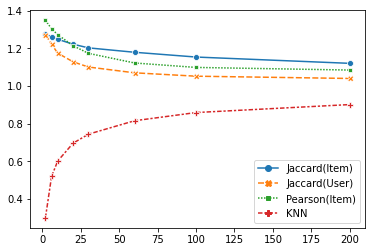

In [130]:
sns.lineplot(sns_jaccard_rsem, markers=True)

### Rating Prediction Accuracy



The five-way classification acc is around 35% for item-based model.  
The user-based model performs really bad for higher k might caused by the diversity of similar user.  

As we said in last part, the KNN part might be lack of confidence, so we don't take the KNN acc in account.



In [131]:
sns_acc = pd.DataFrame(np.array([item_jaccard_acc, user_jaccard_acc,item_pearson_acc, knn_acc]).T, index=n_candidate, columns=["Jaccard(Item)", "Jaccard(User)", "Pearson(Item)", "KNN"])
sns_acc

,Jaccard(Item),Jaccard(User),Pearson(Item),KNN
2,0.284624,0.263733,0.344327,0.928398
6,0.304984,0.187487,0.353659,0.699271
10,0.312089,0.151962,0.360445,0.629822
20,0.323436,0.095228,0.364687,0.558066
30,0.339024,0.066384,0.371474,0.524511
60,0.345175,0.041676,0.376882,0.477553
100,0.354825,0.025239,0.378579,0.448636
200,0.364581,0.013256,0.377413,0.422160


<AxesSubplot:>

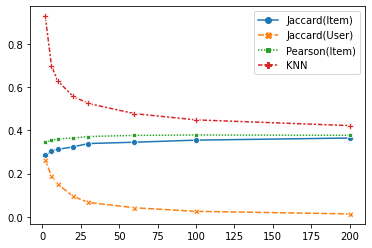

In [132]:
sns.lineplot(sns_acc, markers=True)

## Recommend Result\(Binary classification\)



### 2-way Acc



The acc on recommending is not well on low K in Jaccard distance.  
But  Acc is significant better in Pearson similarity model.



In [93]:

sns_bin_acc = pd.DataFrame(np.array([item_jaccard_bin_acc, user_jaccard_bin_acc, item_pearson_bin_acc,knn_bin_acc]).T, index=n_candidate, columns=["Jaccard(Item)", "Jaccard(User)", "Pearson(Item)", "KNN"])
sns_bin_acc

,Jaccard(Item),Jaccard(User),Pearson(Item),KNN
2,0.487063,0.523542,0.613786,0.982765
6,0.525557,0.556734,0.619300,0.903467
10,0.540933,0.572110,0.627253,0.874186
20,0.564581,0.565642,0.634464,0.836314
30,0.582927,0.564687,0.646129,0.815480
60,0.600318,0.557794,0.652810,0.779717
100,0.614422,0.551220,0.655885,0.753815
200,0.631283,0.539873,0.651644,0.729138


### Precision



User-based model leading very good precision in our experiemnt.   
Which means if we want to recommend good movie for user,  
using user-based model to recommending  has a better chance to like the movie rather than item-based model.



In [90]:
sns_bin_precision = pd.DataFrame(np.array([item_jaccard_bin_precision, user_jaccard_bin_precision, item_pearson_bin_precision,knn_bin_precision]).T, index=n_candidate, columns=["Jaccard(Item)", "Jaccard(User)", "Pearson(Item)", "KNN"])
sns_bin_precision

,Jaccard(Item),Jaccard(User),Pearson(Item),KNN
2,0.665618,0.680473,0.663038,0.982630
6,0.667452,0.690850,0.662628,0.895243
10,0.666862,0.709527,0.666156,0.864957
20,0.672926,0.716493,0.668951,0.828615
30,0.680028,0.733882,0.674926,0.809900
60,0.674825,0.753216,0.672644,0.780441
100,0.675340,0.765793,0.670814,0.757388
200,0.676283,0.777778,0.660872,0.736143


### Recall



Item-based model especially item-based Pearson similarity has higher recall which means  
the result is more relevant to user no matter the user like it or not.  



In [91]:
sns_bin_recall = pd.DataFrame(np.array([item_jaccard_bin_recall, user_jaccard_bin_recall, item_pearson_bin_recall,knn_bin_recall]).T, index=n_candidate, columns=["Jaccard(Item)", "Jaccard(User)", "Pearson(Item)", "KNN"])
sns_bin_recall

,Jaccard(Item),Jaccard(User),Pearson(Item),KNN
2,0.232218,0.336442,0.679283,0.986154
6,0.362589,0.426586,0.699945,0.934116
10,0.416530,0.443957,0.716219,0.914439
20,0.484915,0.415432,0.731944,0.886246
30,0.530444,0.391296,0.752057,0.869134
60,0.599927,0.353264,0.781861,0.835190
100,0.645456,0.325837,0.798501,0.813950
200,0.698665,0.289267,0.820260,0.792490


## Compare the run time on different model 



The user-based jaccard model use more time than other model.  
We think it might caused by   
calculating each value in one time instead of numpy calculate the whole array in one time  
to make it really slow on large K.



In [142]:
sns_time = pd.DataFrame(np.array([item_jaccard_time, user_jaccard_time,item_pearson_time, knn_time]).T, index=n_candidate, columns=["Jaccard(Item)", "Jaccard(User)", "Pearson(Item)", "KNN"])
sns_time

,Jaccard(Item),Jaccard(User),Pearson(Item),KNN
2,3.676750,2.162182,25.631092,5.372061
6,3.621475,4.377478,9.394322,6.038865
10,3.650611,6.594064,6.466204,6.534160
20,3.679125,12.204926,4.370909,7.471330
30,3.745767,17.746416,3.795215,8.353007
60,3.831319,36.303496,3.266614,10.122386
100,3.969106,59.719915,3.178428,11.193172
200,4.328787,113.241957,3.253035,11.615518


<AxesSubplot:>

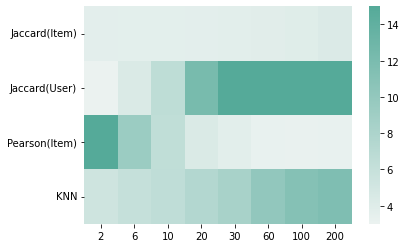

In [155]:
sns.heatmap(sns_time.T, vmin=3, vmax=15, cmap=sns.color_palette("light:#5A9", as_cmap=True) )